# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [95]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import sklearn
from sklearn.decomposition import PCA
from scikitplot.metrics import plot_roc

from sklearn.model_selection import ShuffleSplit, KFold, GroupKFold, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier

In [2]:
dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

data = pd.DataFrame(data)
data = data.drop(0, axis = 1)
#data.rename(columns = np.arange(0, 20), inplace = True)
data.columns = range(0,data.shape[1])

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 18) (549,) (297, 18) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [3]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
763,102,52,98,225,71,10,214,31,24,164,228,682,199,71,0,16,187,196
188,101,51,105,212,68,10,209,32,24,162,222,653,224,73,5,23,186,195
253,94,43,68,170,67,6,142,46,18,142,164,310,177,65,10,8,198,203
409,86,38,86,175,60,9,170,39,21,134,191,433,138,68,1,28,191,199
491,97,45,76,175,60,9,157,42,20,149,180,370,169,63,16,12,198,206
519,88,39,76,155,62,8,137,48,18,137,156,281,124,63,3,6,201,209
348,95,44,84,158,62,10,145,46,19,148,163,312,166,64,10,6,199,206
707,92,35,58,136,58,6,122,55,17,132,142,222,116,64,6,17,197,203
340,89,40,72,155,63,7,146,45,19,135,175,321,145,72,4,10,192,196
521,93,40,73,139,58,6,136,49,18,138,166,275,137,73,0,0,187,188


Methods `describe` and `info` deliver some useful information.

In [4]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,93.584699,44.772313,82.069217,168.264117,61.615665,8.659381,168.284153,41.103825,20.546448,147.899818,188.224044,436.948998,174.249545,72.608379,6.377049,12.448087,188.852459,195.517304
std,8.270883,6.076240,15.565225,34.104998,8.318248,4.895869,33.183291,7.851854,2.583661,14.414326,31.693717,176.709092,32.071169,7.702829,4.948079,8.684218,6.079919,7.414363
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,140.000000,57.000000,6.000000,146.000000,33.000000,19.000000,137.000000,167.000000,317.000000,149.000000,67.000000,2.000000,5.000000,184.000000,190.000000
50%,92.000000,44.000000,80.000000,165.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,177.000000,362.000000,173.000000,72.000000,6.000000,11.000000,189.000000,197.000000
75%,99.000000,49.000000,98.000000,194.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,216.000000,586.000000,197.000000,76.000000,10.000000,18.000000,193.000000,201.000000
max,119.000000,59.000000,110.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,39.000000,206.000000,211.000000


In [5]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 549 entries, 763 to 623
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int32
 1   1       549 non-null    int32
 2   2       549 non-null    int32
 3   3       549 non-null    int32
 4   4       549 non-null    int32
 5   5       549 non-null    int32
 6   6       549 non-null    int32
 7   7       549 non-null    int32
 8   8       549 non-null    int32
 9   9       549 non-null    int32
 10  10      549 non-null    int32
 11  11      549 non-null    int32
 12  12      549 non-null    int32
 13  13      549 non-null    int32
 14  14      549 non-null    int32
 15  15      549 non-null    int32
 16  16      549 non-null    int32
 17  17      549 non-null    int32
dtypes: int32(18)
memory usage: 42.9 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

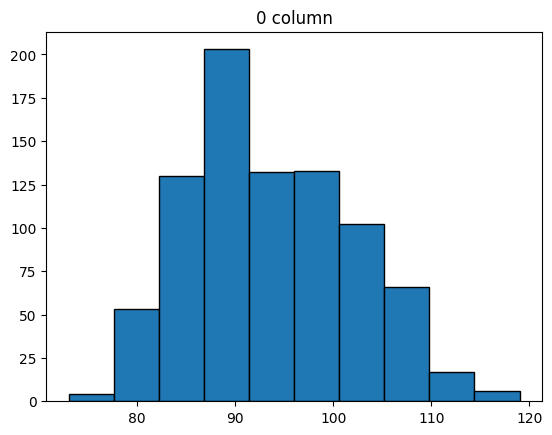

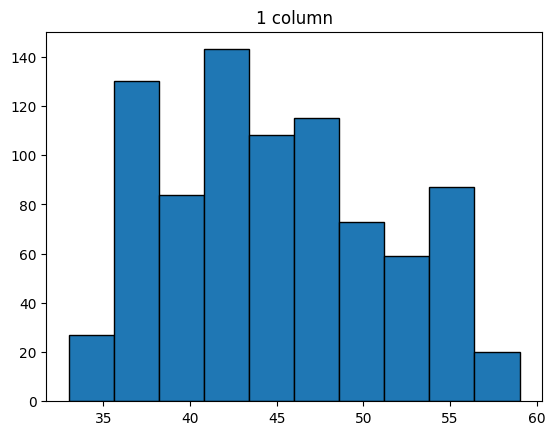

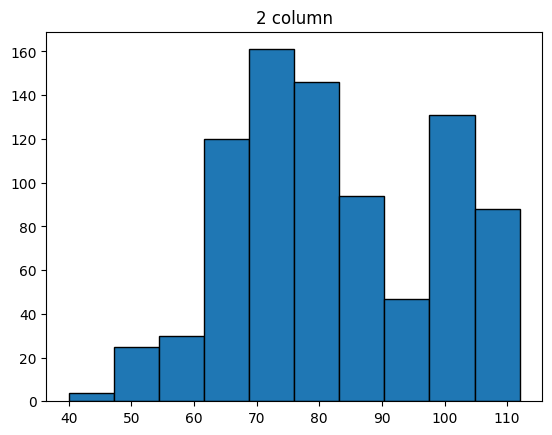

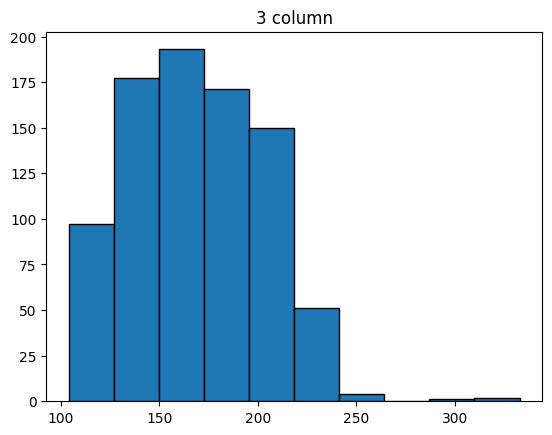

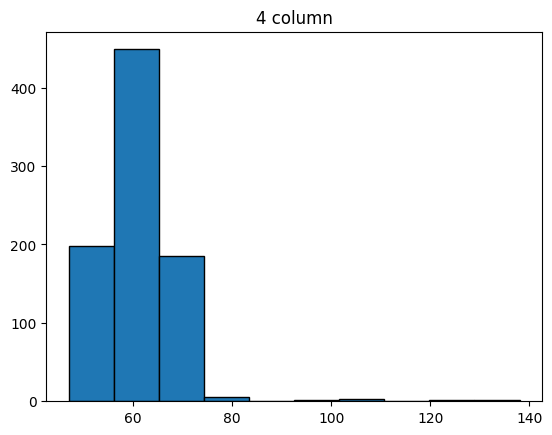

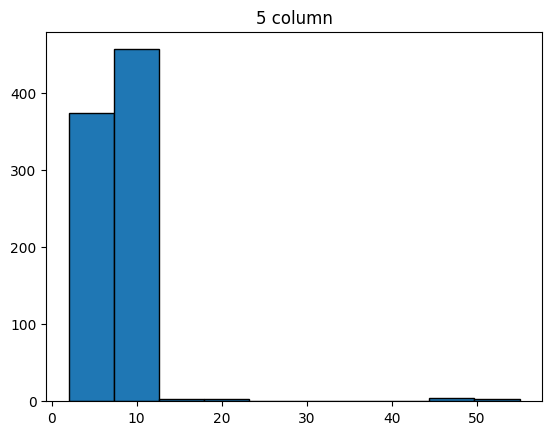

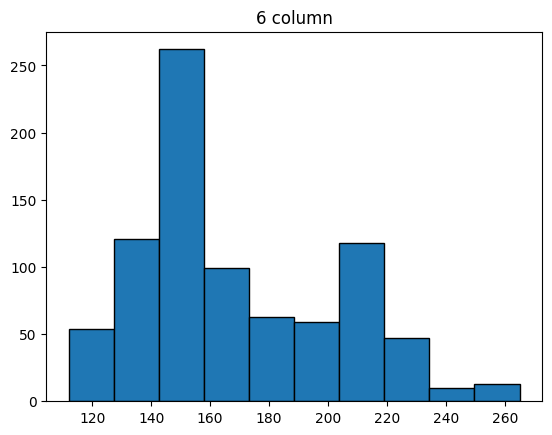

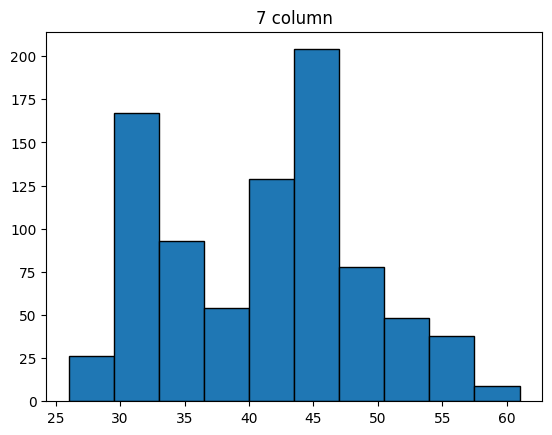

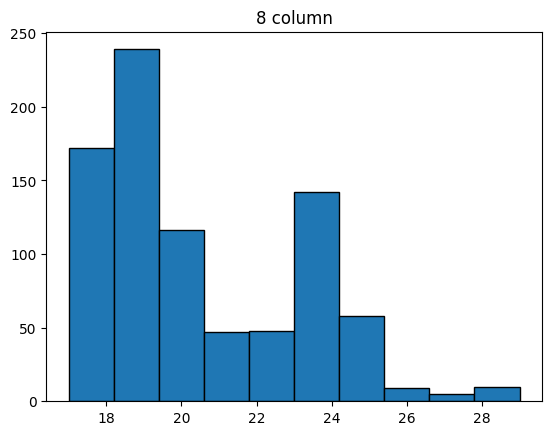

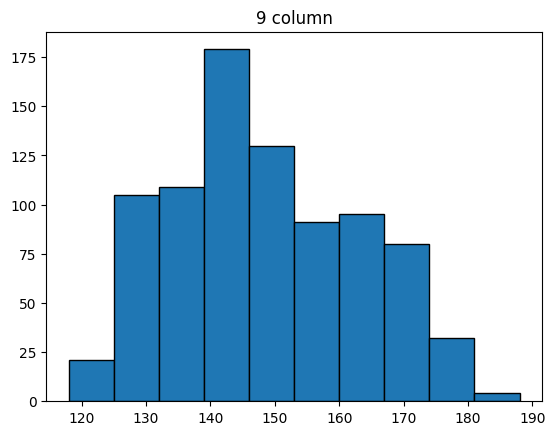

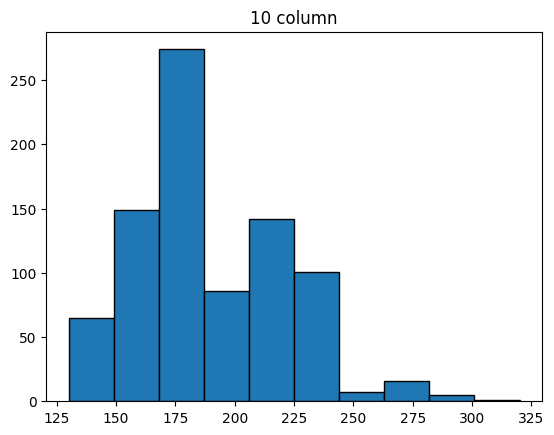

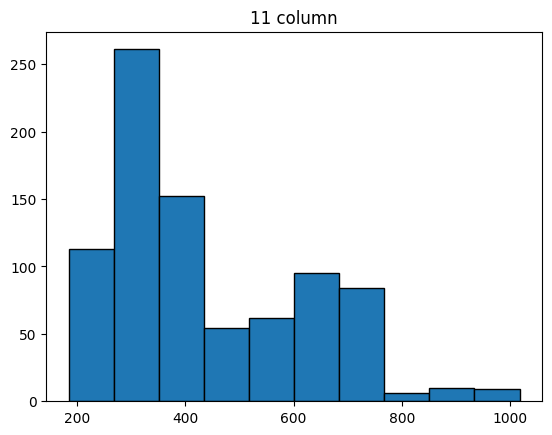

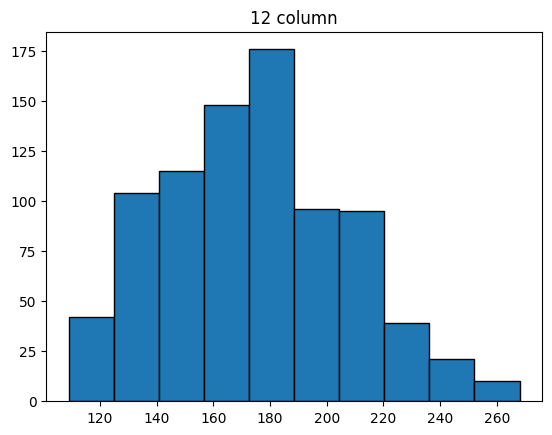

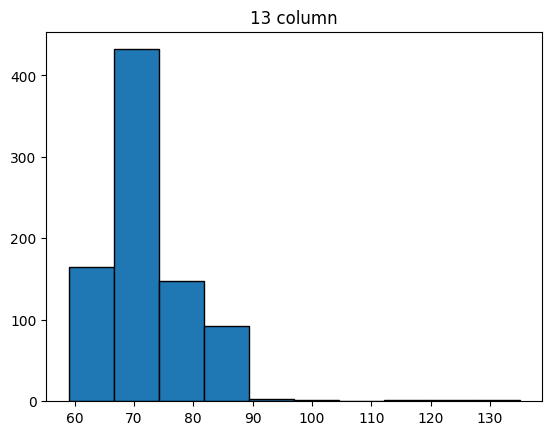

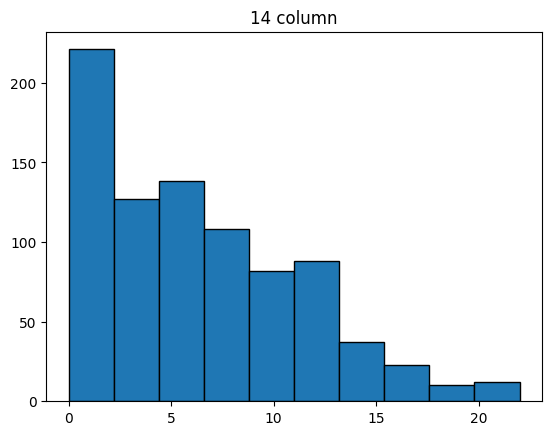

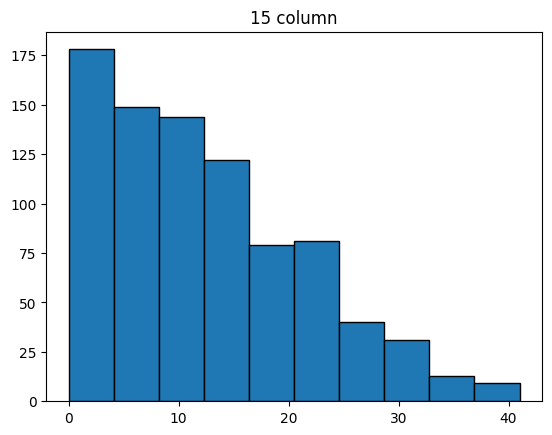

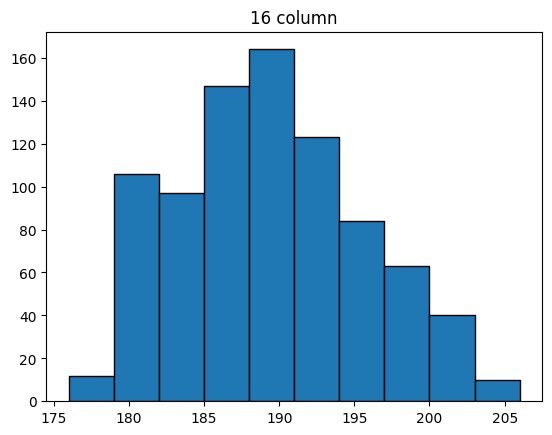

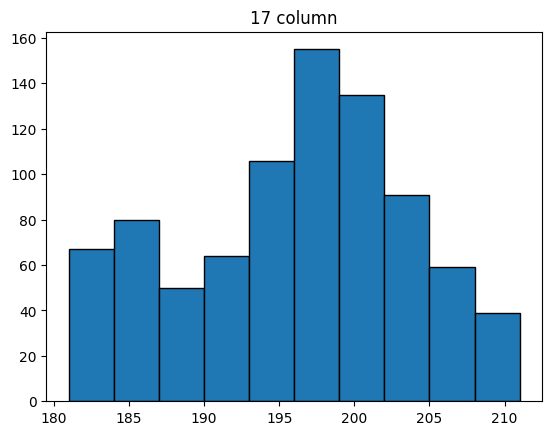

In [6]:
for i in data.columns:
    plt.figure()
    plt.hist(data[i],edgecolor='black')
    plt.title(f'{i} column')
    plt.draw()

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

- Explain: there are no categorical signs and omissions, so it remains only to normalize the data, it will be need for PCA in future

In [7]:
### YOUR CODE HERE
# data_norm = preprocessing.normalize(data, axis=0)
# data_norm = pd.DataFrame(data_norm)

data_norm = data.copy() # == preprocessing.StandardScaler()
#data_norm_med = data.copy()
for col in data_norm.columns:
    data_norm[col] = (data_norm[col] - data[col].mean())/data[col].std() #z preprocessing
    #data_norm_med[col] = (data_norm_med[col] - data[col].median())/data[col].std()
#mse_loss(data_norm, data_norm_med)



#data_norm = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(data))
#data_norm 
data_norm

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.160485,0.508649,0.057784,0.270646,1.306519,0.311358,-0.205723,0.136489,-0.224811,0.757884,-0.402146,-0.344731,0.285643,-0.328861,-0.076666,0.380766,-0.313537,0.183849
1,-0.325277,-0.625897,0.121190,-0.834750,-0.595044,0.094024,-0.596759,0.520535,-0.610593,-0.344374,-0.593260,-0.622048,-0.513214,-0.061731,0.533295,0.156833,0.010931,0.452709
2,1.253451,0.832805,1.516108,1.196788,0.545894,0.311358,1.147865,-1.143665,0.932534,0.688993,1.094916,1.104113,1.391753,0.071835,1.549895,-0.403000,-0.151303,0.049418
3,-0.082396,-0.625897,-0.005621,-0.296990,0.165581,0.094024,-0.747158,0.648551,-0.610593,-0.344374,-0.911784,-0.740899,-1.465698,-1.263818,-0.076666,-0.291034,1.633267,1.528152
4,-1.053921,-0.139663,-0.766486,1.077286,5.236414,9.439378,-0.596759,0.520535,-0.610593,-0.275483,1.668259,-0.650346,0.408545,7.284361,0.533295,-0.179067,-1.449172,-1.698176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,-0.082396,-0.950053,0.311406,0.420023,0.292352,-0.123310,0.004836,-0.119542,-0.224811,-0.964395,0.362311,-0.101370,-0.789741,-0.061731,0.126654,1.388464,-0.151303,-0.085012
842,-0.568159,0.184493,0.121190,-0.177488,0.545894,0.528691,-0.295962,0.264505,-0.224811,0.757884,-0.497703,-0.406986,0.039841,-0.061731,-1.093266,0.828632,-0.475770,0.183849
843,1.496333,1.481118,1.199081,1.585170,0.672665,0.746025,1.599061,-1.399696,1.704098,1.722360,1.254178,1.590834,0.777248,-0.328861,-0.686626,-0.962833,-0.313537,0.721570
844,-0.932481,-1.436288,-0.259243,-0.685372,-0.468273,-0.340644,-1.017875,1.160612,-0.996375,-1.653306,-1.071045,-0.961621,-0.820467,-0.863122,-1.296586,1.388464,0.173164,-0.085012


In [8]:
# for i in data_norm_med.columns:
#     plt.figure()
#     plt.hist(data_norm_med[i],edgecolor='black')
#     plt.title(f'{i} column')
#     plt.draw()

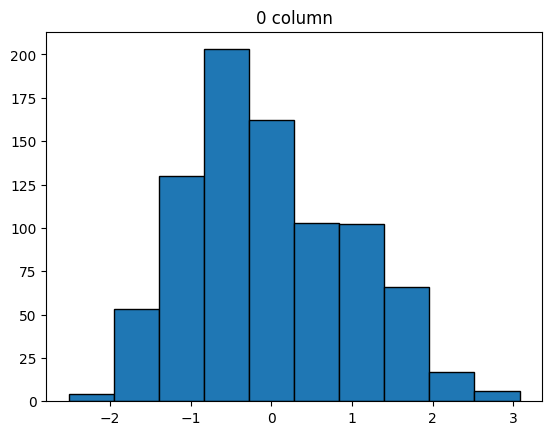

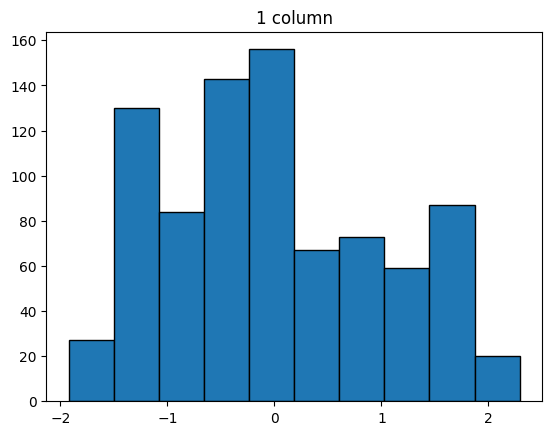

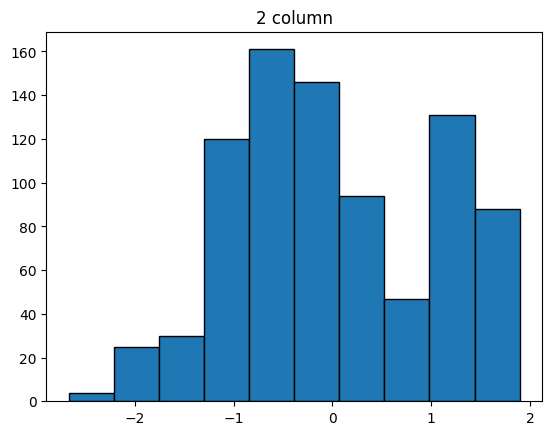

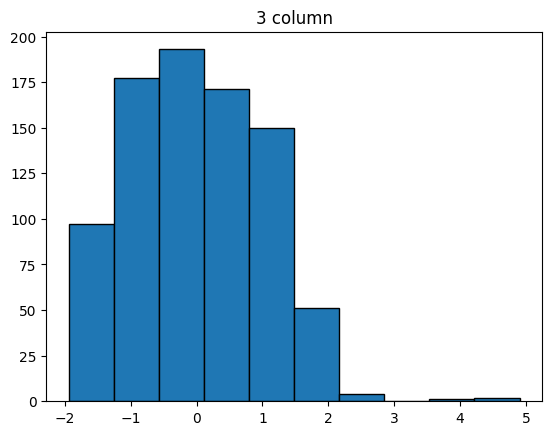

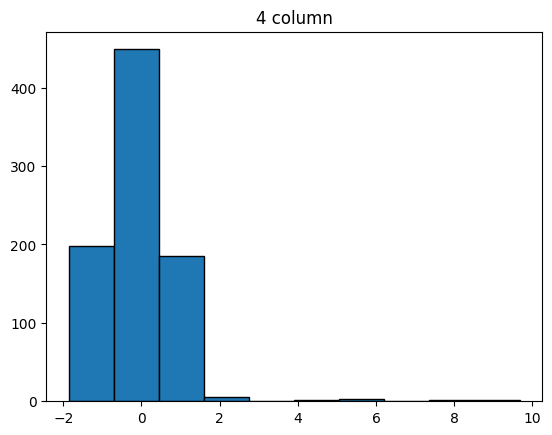

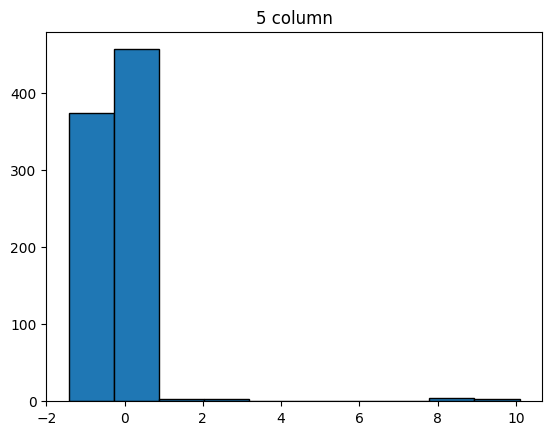

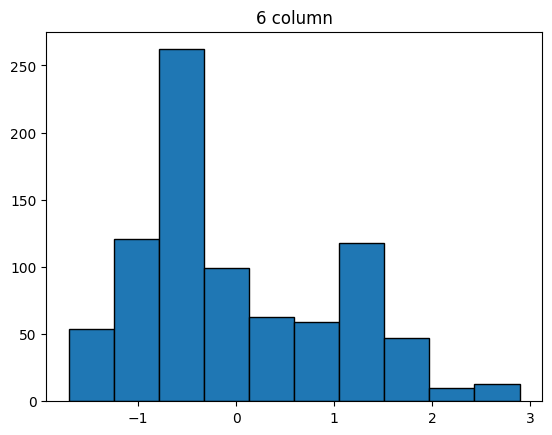

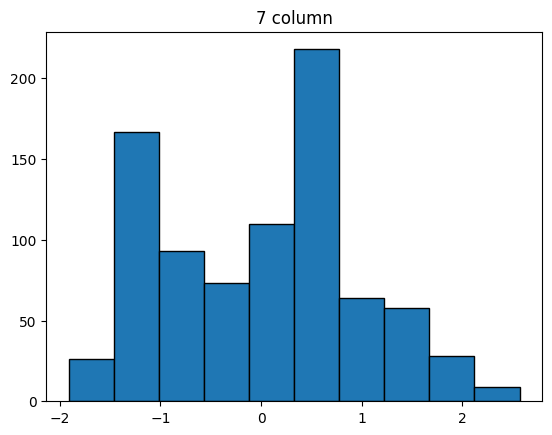

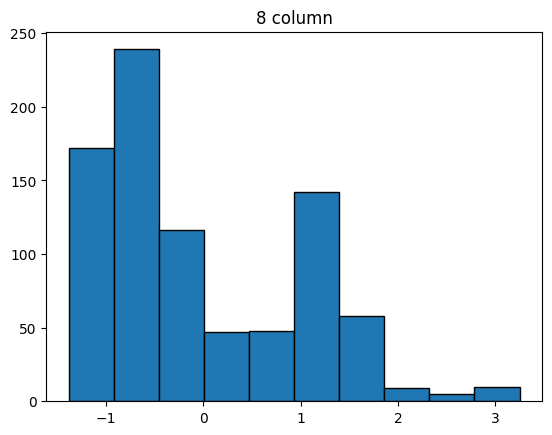

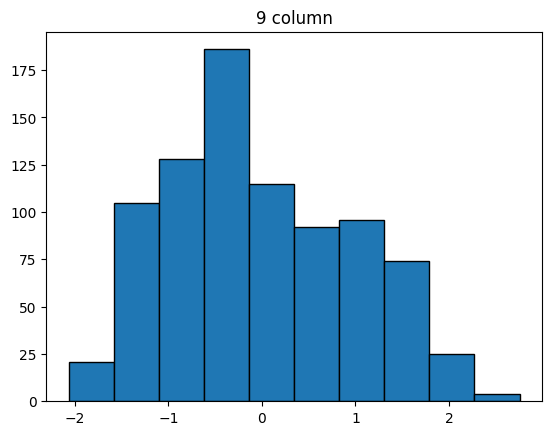

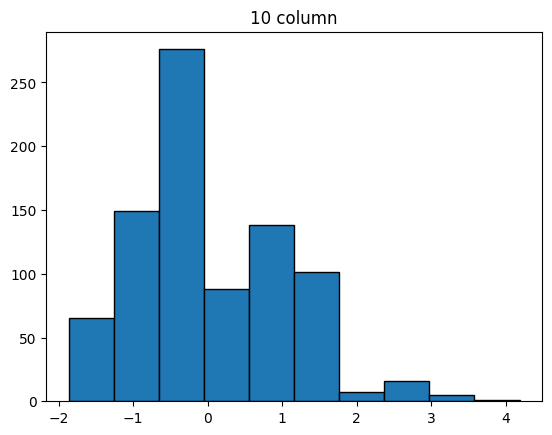

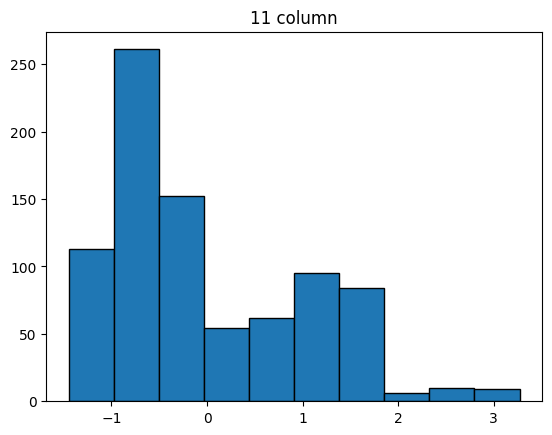

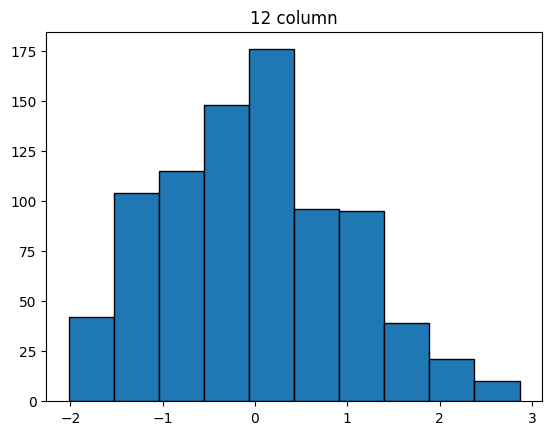

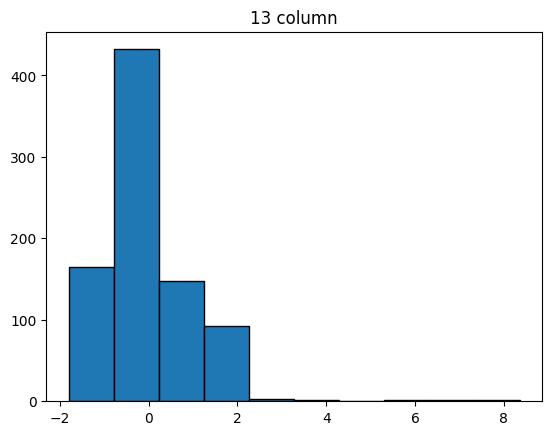

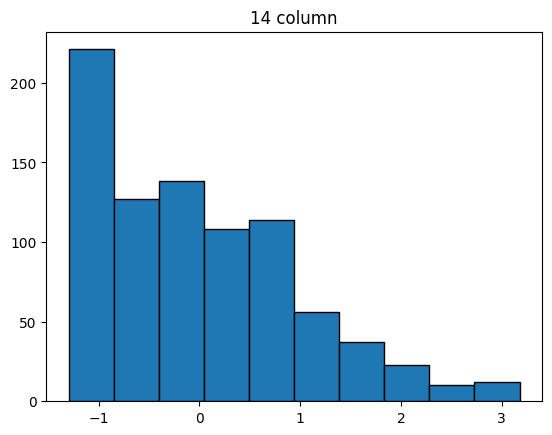

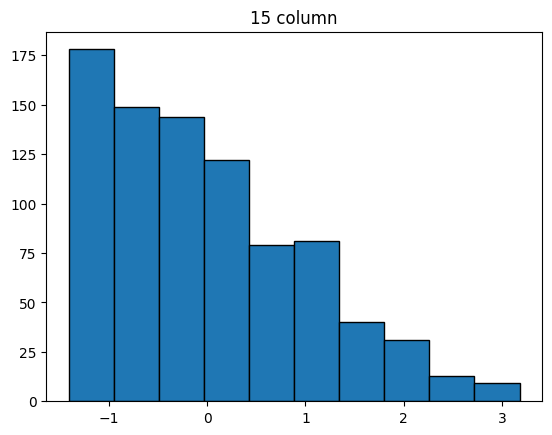

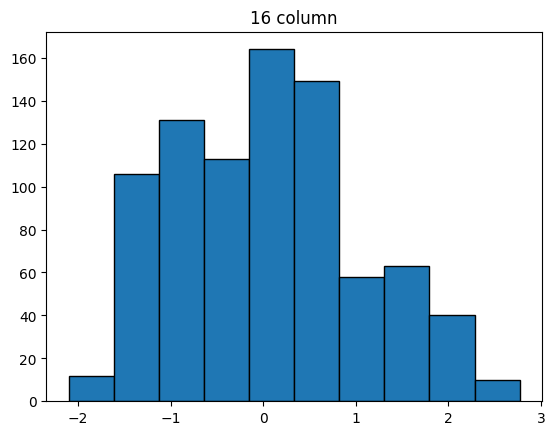

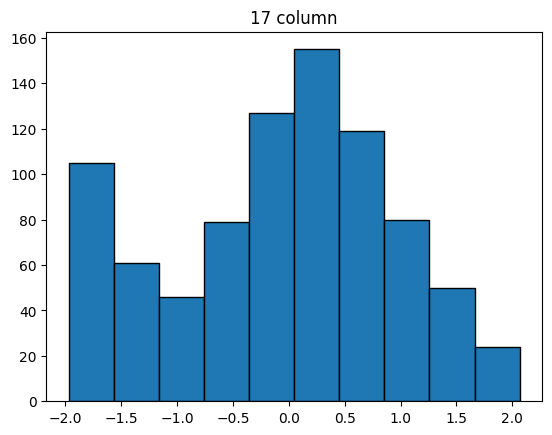

In [9]:
for i in data_norm.columns:
    plt.figure()
    plt.hist(data_norm[i],edgecolor='black')
    plt.title(f'{i} column')
    plt.draw()

<AxesSubplot: >

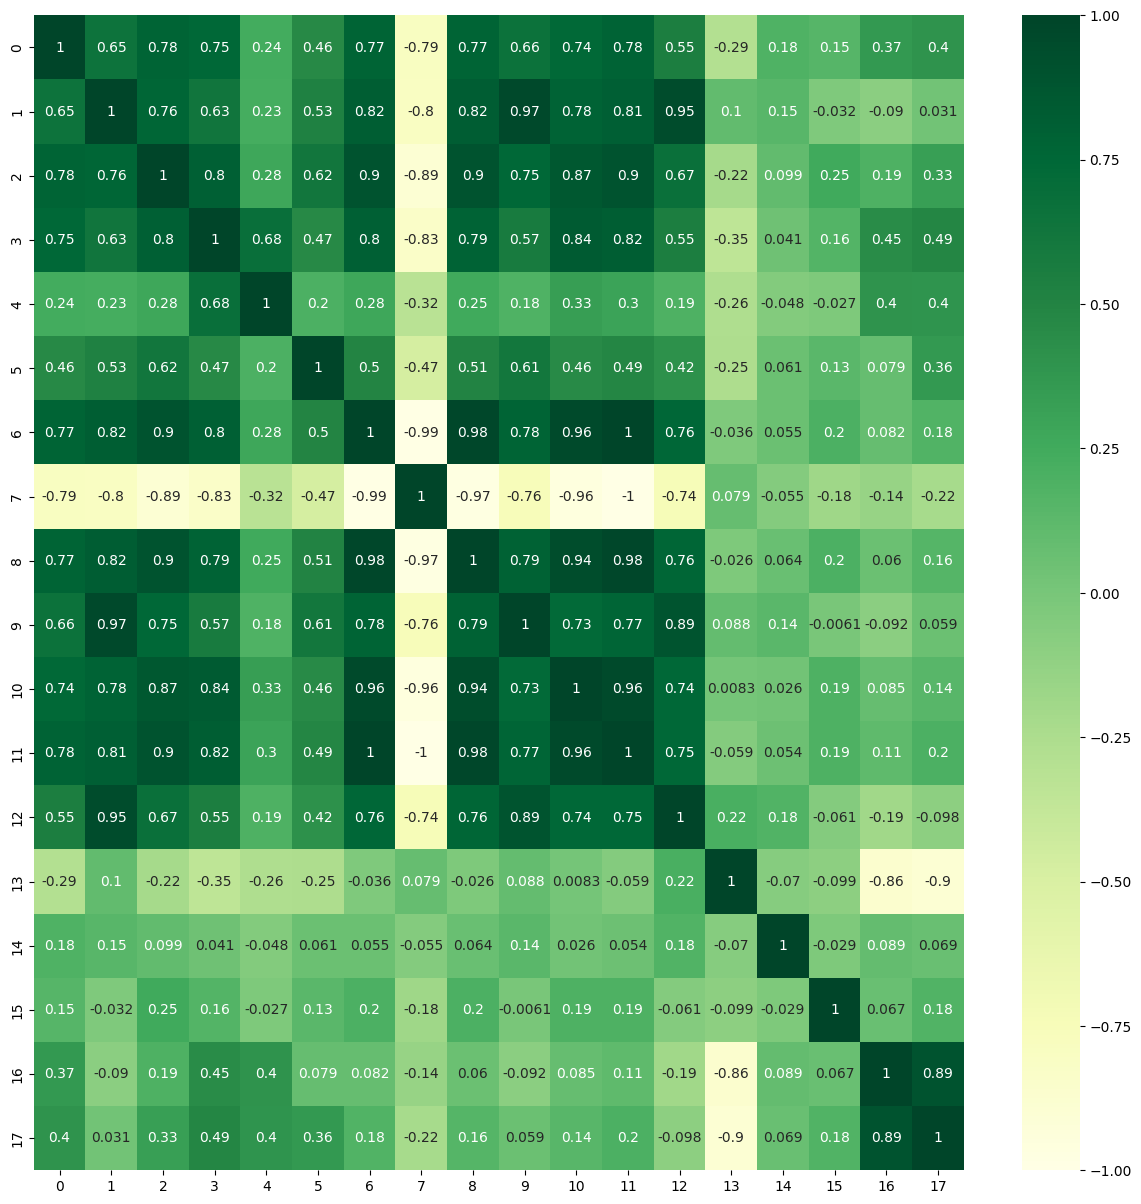

In [10]:
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(data_norm.corr(method='spearman'), 
         vmin=-1, vmax=1,annot=True,cmap="YlGn",ax=ax)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(549, 18) (549,) (297, 18) (297,)


#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [12]:
### YOUR CODE HERE
clf = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)
cv = StratifiedKFold(n_splits=10)

parameters = {'C': np.linspace(0.01, 10.0, 50), 'penalty':  ['l1', 'l2']}

grid_base_lr = GridSearchCV(estimator=clf,
             param_grid=parameters, cv = cv)
grid_base_lr=grid_base_lr.fit(X_train, y_train)
grid_base_lr.score(X_train, y_train)

pd.DataFrame(grid_base_lr.cv_results_)[['mean_test_score', 'std_test_score', 'params']].sort_values(by='mean_test_score',
                                                                                            ascending = False)

,mean_test_score,std_test_score,params
50,0.730471,0.029757,"{'C': 5.106938775510204, 'penalty': 'l1'}"
63,0.730471,0.029757,"{'C': 6.330204081632653, 'penalty': 'l2'}"
73,0.730471,0.029757,"{'C': 7.349591836734694, 'penalty': 'l2'}"
72,0.730471,0.029757,"{'C': 7.349591836734694, 'penalty': 'l1'}"
71,0.730471,0.029757,"{'C': 7.145714285714286, 'penalty': 'l2'}"
...,...,...,...
30,0.730471,0.029757,"{'C': 3.068163265306122, 'penalty': 'l1'}"
29,0.730471,0.029757,"{'C': 2.864285714285714, 'penalty': 'l2'}"
28,0.730471,0.029757,"{'C': 2.864285714285714, 'penalty': 'l1'}"
2,0.725017,0.030392,"{'C': 0.21387755102040817, 'penalty': 'l1'}"


In [28]:
grid_base_lr.best_estimator_ 

LogisticRegression(C=0.01, max_iter=500, multi_class='multinomial',
                   solver='saga', tol=0.001)

In [30]:
clf_best_lr =  grid_base_lr.best_estimator_
clf_best_lr.fit(X_train, y_train)

pred = clf_best_lr.predict(X_test)
print('accuracy score: ', sklearn.metrics.accuracy_score(pred, y_test))
print('f1 score:', sklearn.metrics.f1_score(pred, y_test, average='weighted'))

accuracy score:  0.6902356902356902
f1 score: 0.7093149601570793


<AxesSubplot: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

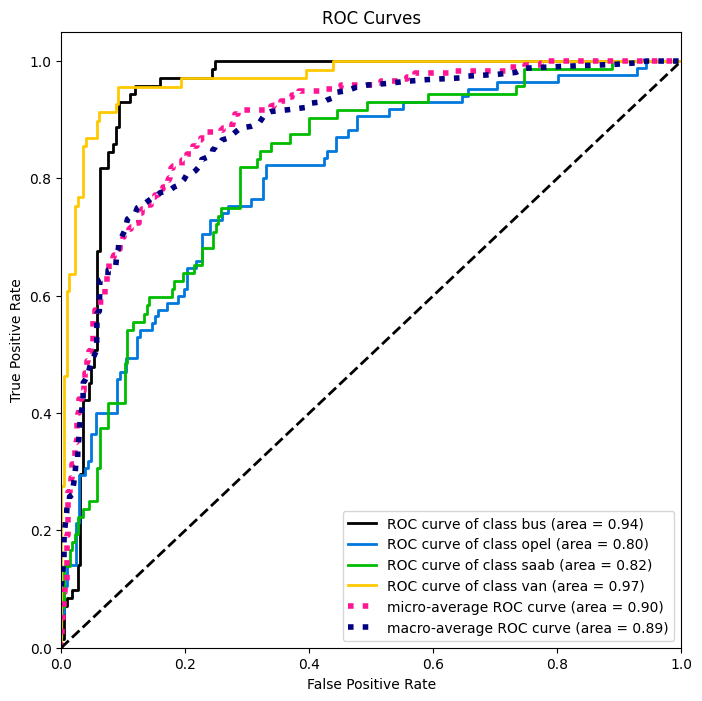

In [31]:
pred_prob = clf_best_lr.predict_proba(X_test)
plot_roc(y_test, pred_prob, figsize=(8,8))

In [32]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

# ! pip install scikit-plot

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

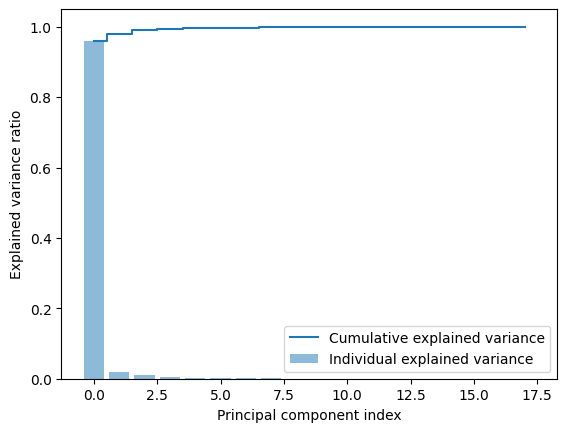

In [33]:
### YOUR CODE HERE
pca = PCA(n_components = X_train.shape[1]) # basis of 18 vectors
pca.fit(X_train)
exp_var_pca = pca.explained_variance_ratio_

sum_eigenvalues = np.cumsum(exp_var_pca)

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(sum_eigenvalues)), sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [34]:
pca = PCA(0.99).fit(X_train)
print('We need %d components to explain 99%% of variance' % pca.n_components_)

We need 4 components to explain 99% of variance


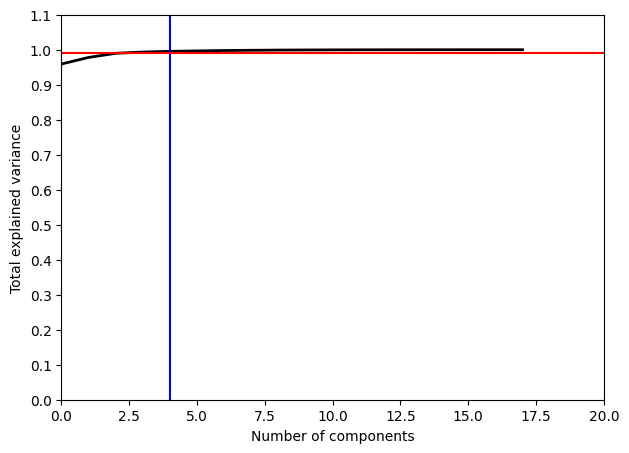

In [35]:
plt.figure(figsize=(7,5))
plt.plot(np.cumsum(exp_var_pca), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 20)
plt.yticks(np.arange(0, 1.2, 0.1))
plt.axvline(pca.n_components_, c='b')
plt.axhline(0.99, c='r')
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

We should normalize the data for PCA, because it aligns the contribution of each of the components, and for PCA to work, the data needs to be centered

In [36]:
X_train, X_test, y_train, y_test = train_test_split(data_norm, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(549, 18) (549,) (297, 18) (297,)


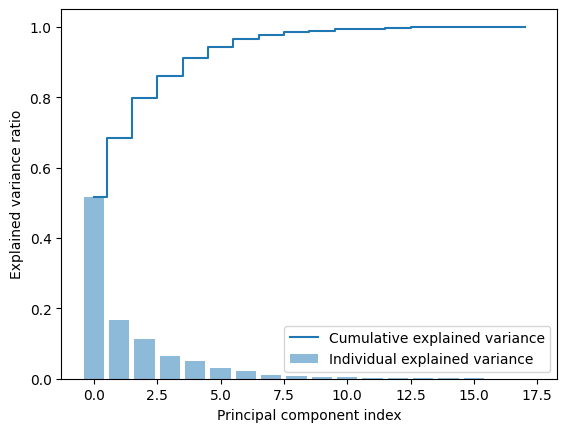

In [37]:
pca = PCA(n_components = X_train.shape[1]) # basis of 18 vectors
pca.fit(X_train)
exp_var_pca = pca.explained_variance_ratio_

sum_eigenvalues = np.cumsum(exp_var_pca)

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(sum_eigenvalues)), sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [38]:
pca = PCA(0.99).fit(X_train)
print('We need %d components to explain 99%% of variance' % pca.n_components_)

We need 11 components to explain 99% of variance


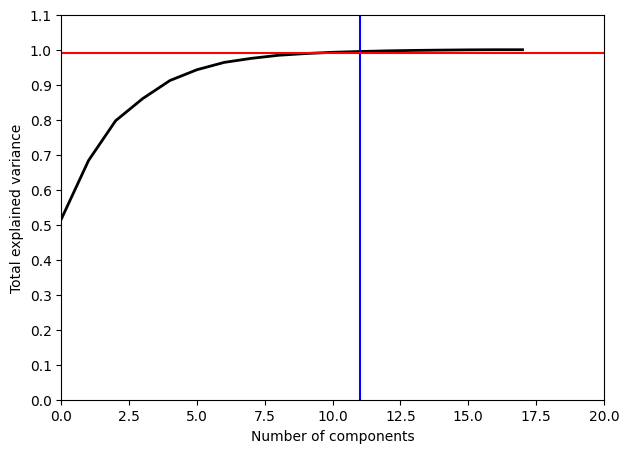

In [39]:
plt.figure(figsize=(7,5))
plt.plot(np.cumsum(exp_var_pca), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 20)
plt.yticks(np.arange(0, 1.2, 0.1))
plt.axvline(pca.n_components_, c='b')
plt.axhline(0.99, c='r')
plt.show()

In [40]:
### YOUR CODE HERE
pca_update = PCA(n_components = pca.n_components_)
X_train_pca = pd.DataFrame(pca_update.fit_transform(X_train))
X_test_pca = pd.DataFrame(pca_update.transform(X_test))

In [41]:
X_train_pca

,0,1,2,3,4,5,6,7,8,9,10
0,3.911063,-0.579003,-0.725678,2.295778,0.731761,0.276323,1.648460,-0.383783,-0.174626,-0.132211,-0.104794
1,-0.946088,-2.366001,0.628355,-1.082836,-0.120254,1.234766,0.305114,0.895480,0.080407,-0.518565,-0.024544
2,0.957866,4.960052,13.613827,-0.392882,0.135278,0.080749,0.819754,0.230713,0.353757,0.056388,-0.332556
3,-0.102122,0.602311,-0.208149,0.348540,-0.225200,-0.164011,-0.493785,-0.413796,0.239286,0.182164,0.050807
4,3.989949,0.803474,-1.102237,-0.450062,-1.052575,-0.821825,0.944454,0.646459,0.247859,0.112918,0.053744
...,...,...,...,...,...,...,...,...,...,...,...
544,-0.358412,0.298027,0.604674,-0.921835,-0.115037,-1.364695,-0.861495,0.062602,-0.335488,-0.208466,0.200207
545,4.290198,1.086253,-1.168409,0.223509,-1.106704,-0.422126,0.738345,0.468085,0.107019,-0.350838,-0.194102
546,-2.546394,-3.207532,-0.089948,0.254884,0.558033,-0.655032,0.149351,0.239361,0.333522,-0.383932,0.265814
547,-2.621494,-0.352651,-0.055709,0.868507,-0.558939,-0.614130,0.189933,0.379677,0.045486,0.358009,-0.202227


**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [42]:
### YOUR CODE HERE
clf = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)
cv = StratifiedKFold(n_splits=10)

parameters = {'C': np.linspace(0.01, 10.0, 50), 'penalty':  ['l1', 'l2']}

grid_pca_lr = GridSearchCV(estimator=clf,
             param_grid=parameters, cv = cv)
grid_pca_lr = grid_pca_lr.fit(X_train_pca, y_train)
grid_pca_lr.score(X_train_pca, y_train)

pd.DataFrame(grid_pca_lr.cv_results_)[['mean_test_score', 'std_test_score', 'params']].sort_values(by='mean_test_score',
                                                                                            ascending = False)

,mean_test_score,std_test_score,params
10,0.741279,0.040958,"{'C': 1.029387755102041, 'penalty': 'l1'}"
8,0.741279,0.040958,"{'C': 0.8255102040816327, 'penalty': 'l1'}"
12,0.739461,0.047128,"{'C': 1.233265306122449, 'penalty': 'l1'}"
19,0.737643,0.049268,"{'C': 1.8448979591836736, 'penalty': 'l2'}"
17,0.737643,0.049268,"{'C': 1.6410204081632653, 'penalty': 'l2'}"
...,...,...,...
7,0.728519,0.044652,"{'C': 0.6216326530612245, 'penalty': 'l2'}"
5,0.728519,0.047521,"{'C': 0.41775510204081634, 'penalty': 'l2'}"
75,0.726734,0.052906,"{'C': 7.553469387755102, 'penalty': 'l2'}"
1,0.670269,0.026749,"{'C': 0.01, 'penalty': 'l2'}"


In [43]:
grid_pca_lr.best_estimator_

LogisticRegression(C=0.8255102040816327, max_iter=500,
                   multi_class='multinomial', penalty='l1', solver='saga',
                   tol=0.001)

In [44]:
clf_best_pca = grid_pca_lr.best_estimator_ #LogisticRegression(C = 0.4177, penalty = 'l2', multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)
clf_best_pca.fit(X_train_pca, y_train)

pred_pca = clf_best_pca.predict(X_test_pca)
print('accuracy score: ', sklearn.metrics.accuracy_score(pred_pca, y_test))
print('f1 score:', sklearn.metrics.f1_score(pred_pca, y_test, average='weighted'))

accuracy score:  0.7609427609427609
f1 score: 0.7608520064718959


<AxesSubplot: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

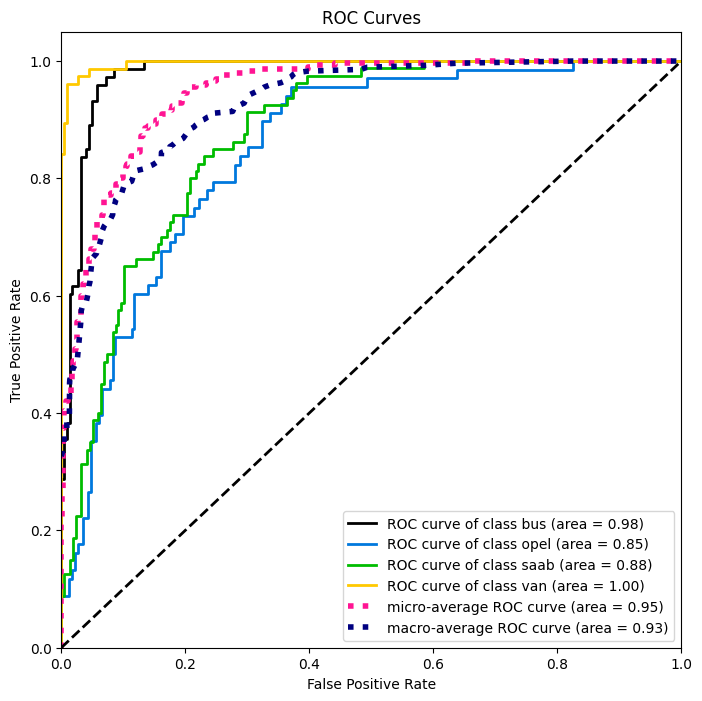

In [45]:
pred_prob = clf_best_pca.predict_proba(X_test_pca)
plot_roc(y_test, pred_prob, figsize=(8,8))

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [46]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(549, 18) (549,) (297, 18) (297,)


In [47]:
from sklearn.tree import DecisionTreeClassifier
# YOUR CODE HERE
clf_tree = DecisionTreeClassifier()
cv = StratifiedKFold(n_splits=10)

parameters = {'criterion':["gini", "entropy", "log_loss"],'max_depth': np.arange(1, 20),"splitter":["best", "random"]}

grid_tree = GridSearchCV(estimator=clf_tree,
             param_grid=parameters, cv = cv)
grid_tree = grid_tree.fit(X_train, y_train)
grid_tree.score(X_train, y_train)
#print(grid_tree.best_score_)
#print(grid.best_estimator_)
pd.DataFrame(grid_tree.cv_results_)[['mean_test_score', 'std_test_score', 'params']].sort_values(by='mean_test_score', ascending = False)


,mean_test_score,std_test_score,params
73,0.717677,0.046813,"{'criterion': 'entropy', 'max_depth': 18, 'spl..."
103,0.717643,0.055410,"{'criterion': 'log_loss', 'max_depth': 14, 'sp..."
67,0.712323,0.055135,"{'criterion': 'entropy', 'max_depth': 15, 'spl..."
63,0.712189,0.071766,"{'criterion': 'entropy', 'max_depth': 13, 'spl..."
90,0.712054,0.052957,"{'criterion': 'log_loss', 'max_depth': 8, 'spl..."
...,...,...,...
76,0.417071,0.024092,"{'criterion': 'log_loss', 'max_depth': 1, 'spl..."
0,0.413434,0.025005,"{'criterion': 'gini', 'max_depth': 1, 'splitte..."
1,0.384310,0.051493,"{'criterion': 'gini', 'max_depth': 1, 'splitte..."
39,0.378822,0.027239,"{'criterion': 'entropy', 'max_depth': 1, 'spli..."


In [48]:
grid_tree.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=18, splitter='random')

In [49]:
clf_best_tree = grid_tree.best_estimator_
clf_best_tree.fit(X_train, y_train)

pred = clf_best_tree.predict(X_test)
print('accuracy score: ', sklearn.metrics.accuracy_score(pred, y_test))
print('f1 score:', sklearn.metrics.f1_score(pred, y_test, average='weighted'))

accuracy score:  0.7205387205387206
f1 score: 0.723413495061904


#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [50]:
# YOUR CODE HERE

In [51]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(549, 18) (549,) (297, 18) (297,)


In [52]:
f1_scores_tree = np.array([])
accuracy_scores_tree = np.array([])
for i in range(2,101,5):
    clf = BaggingClassifier(base_estimator=clf_best_tree, n_estimators=i, bootstrap=True, random_state=0,
                            max_samples=100)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    f1_scores_tree = np.append(f1_scores_tree, sklearn.metrics.f1_score(pred, y_test, average='weighted'))
    accuracy_scores_tree = np.append(accuracy_scores_tree, sklearn.metrics.accuracy_score(pred, y_test))

In [55]:
X_train, X_test, y_train, y_test = train_test_split(data_norm, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(549, 18) (549,) (297, 18) (297,)


In [56]:
f1_scores_lr = np.array([])
accuracy_scores_lr = np.array([])
for i in range(2,101,5):
    clf = BaggingClassifier(base_estimator=clf_best_pca, n_estimators=i, bootstrap=True, random_state=0,
                            max_samples = 100)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    f1_scores_lr = np.append(f1_scores_lr, sklearn.metrics.f1_score(pred, y_test, average='weighted'))
    accuracy_scores_lr = np.append(accuracy_scores_lr, sklearn.metrics.accuracy_score(pred, y_test))

In [57]:
estimators = np.arange(2,101,5)

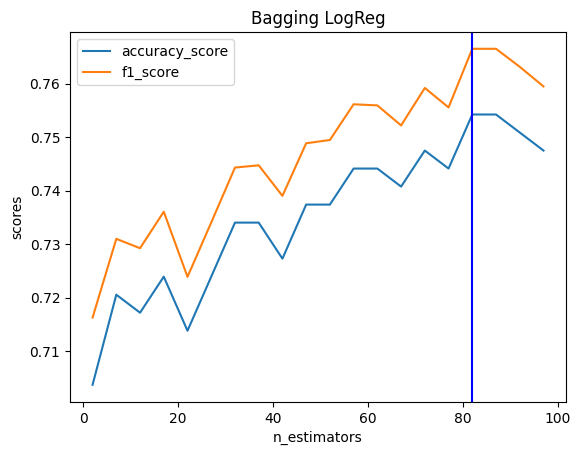

In [58]:
plt.plot(estimators, accuracy_scores_lr, label = 'accuracy_score')
plt.plot(estimators, f1_scores_lr, label = 'f1_score')
plt.xlabel('n_estimators')
plt.axvline(estimators[accuracy_scores_lr.argmax()], c='b')
plt.ylabel('scores')
plt.title('Bagging LogReg')
plt.legend()

## for log reg bagging enought 35-60 estiamtors, more increases the accuracy slightly

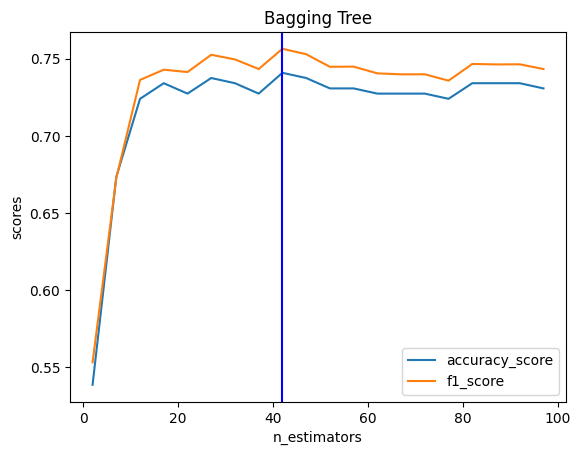

In [59]:
plt.plot(estimators, accuracy_scores_tree, label = 'accuracy_score')
plt.plot(estimators, f1_scores_tree, label = 'f1_score')
plt.xlabel('n_estimators')
plt.ylabel('scores')
plt.axvline(estimators[accuracy_scores_tree.argmax()], c='b')
plt.title("Bagging Tree")
plt.legend()

## for bagging tree enought $\approx$ 20 estiamtors Using parameters from 2.5 is not the best idea, because there will be a high correlation of responses, since they are all based on an algorithm with the same initial hyper parameters. Therefore, there is a random tree

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [60]:
from sklearn.ensemble import RandomForestClassifier

f1_scores_rndtree = np.array([])
accuracy_scores_rndtree = np.array([])
for i in range(2,101,5):
    clf = RandomForestClassifier(n_estimators=i, max_samples=100, bootstrap=True)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    f1_scores_rndtree = np.append(f1_scores_rndtree, sklearn.metrics.f1_score(pred, y_test, average='weighted'))
    accuracy_scores_rndtree = np.append(accuracy_scores_rndtree, sklearn.metrics.accuracy_score(pred, y_test))

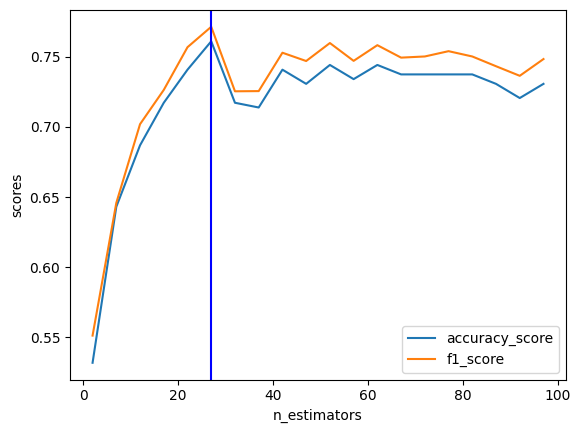

In [61]:
plt.plot(estimators, accuracy_scores_rndtree, label = 'accuracy_score')
plt.plot(estimators, f1_scores_rndtree, label = 'f1_score')
plt.xlabel('n_estimators')
plt.ylabel('scores')
plt.axvline(estimators[accuracy_scores_rndtree.argmax()], c='b')
plt.legend()

## To take equal accuracy in bagging tree, bagging LogReg, Random tree need same of estiamtors $\approx$ 30

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

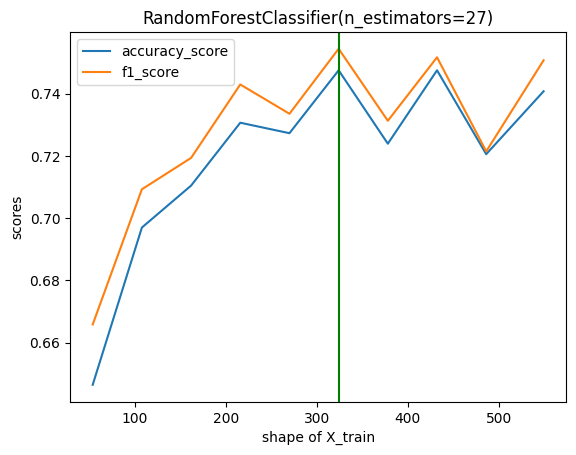

D:\AnacondaGO\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AnacondaGO\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\AnacondaGO\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


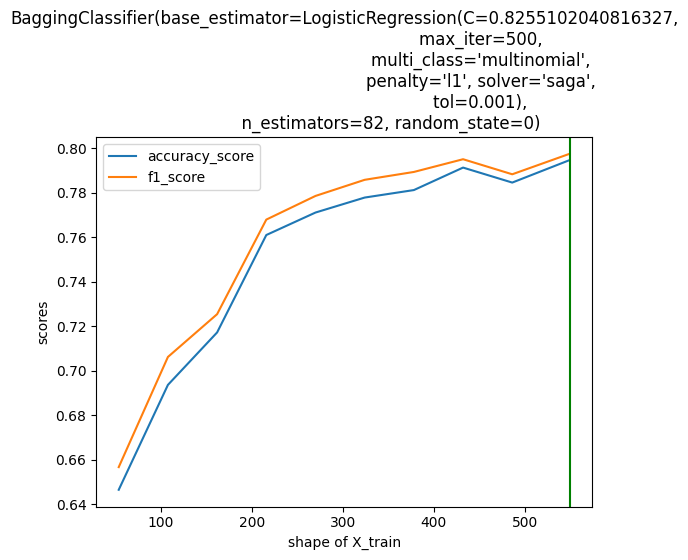

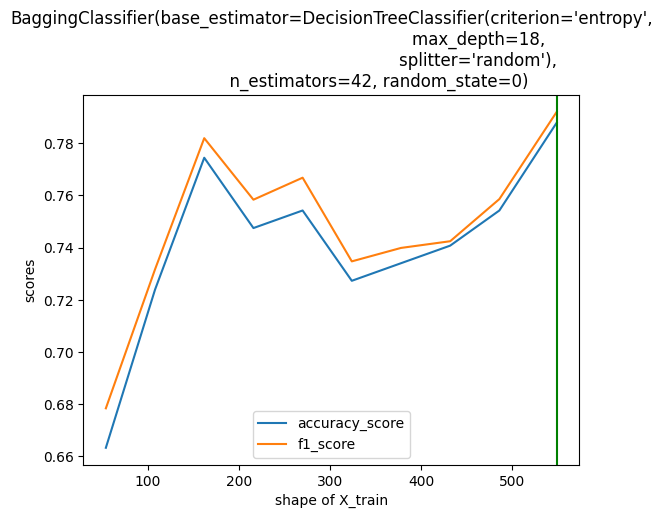

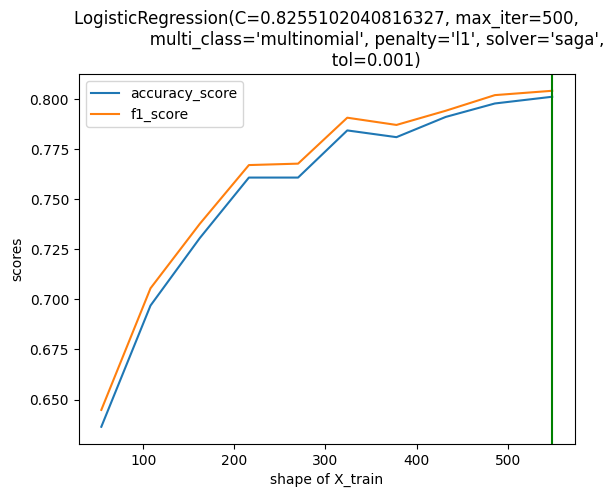

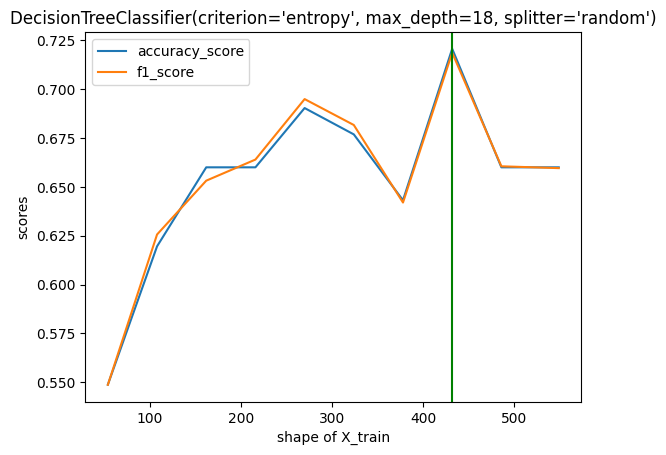

In [62]:
# YOUR CODE HERE
#X_train[:int(X_train.shape[0]*1/10)+1].shape

models = [RandomForestClassifier(n_estimators = estimators[accuracy_scores_rndtree.argmax()], bootstrap=True),
          BaggingClassifier(base_estimator=clf_best_pca, n_estimators=estimators[accuracy_scores_lr.argmax()], bootstrap=True, random_state=0),
          BaggingClassifier(base_estimator=clf_best_tree, n_estimators=estimators[accuracy_scores_tree.argmax()], bootstrap=True, random_state=0),
          clf_best_pca,
          clf_best_tree
         ]

train_shape = np.arange(int(X_train.shape[0]*1/10), X_train.shape[0], int(X_train.shape[0]*1/10))
train_shape[-1] = X_train.shape[0]
for mod in models:
    f1_scor = np.array([])
    accuracy_scor = np.array([])
    for i in range(0,10):
        mod.fit(X_train[:train_shape[i]], y_train[:train_shape[i]])
        pred = mod.predict(X_test)
        f1_scor = np.append(f1_scor, sklearn.metrics.f1_score(pred, y_test, average='weighted'))
        accuracy_scor = np.append(accuracy_scor, sklearn.metrics.accuracy_score(pred, y_test))
    plt.plot(train_shape, accuracy_scor, label = 'accuracy_score')
    plt.plot(train_shape, f1_scor, label = 'f1_score')
    plt.xlabel(f'shape of X_train')
    plt.ylabel('scores')
    plt.title(f'{mod}')
    plt.axvline(train_shape[accuracy_scor.argmax()], c='g')
    plt.legend()
    plt.show()

In [63]:
train_shape = np.arange(int(X_train.shape[0]*1/10), X_train.shape[0], int(X_train.shape[0]*1/10))

In [64]:
train_shape[-1] = X_train.shape[0]

In [65]:
accuracy_scor

array([0.54882155, 0.61952862, 0.65993266, 0.65993266, 0.69023569,
       0.67676768, 0.64309764, 0.72053872, 0.65993266, 0.65993266])